In [161]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [162]:
from dataclasses import dataclass

@dataclass
class ExperimentResult:
  key: str
  bytes_pr_operation: int
  operations: int

In [163]:
lines = []
with open('/content/drive/MyDrive/3peer.log') as f:
    lines = f.readlines()

In [164]:
machine_readable_lines = filter(lambda x: x.startswith('$'), lines)
stripped_lines = map(lambda x: x[1:].strip(), machine_readable_lines)
split_lines = map(lambda x: x.split(';'), stripped_lines)
experiment_results = list(map(lambda x: ExperimentResult(x[0], int(x[1]), int(x[2])), split_lines))

In [165]:
machine_readable_lines = filter(lambda x: x.startswith('$'), lines)
stripped_lines = map(lambda x: x[1:].strip(), machine_readable_lines)
split_lines = map(lambda x: x.split(';'), stripped_lines)
sorted_lines = sorted(list(split_lines), key=lambda x: x[0])
sorted_lines

[['DMA_READ', '1', '145047'],
 ['DMA_READ', '1024', '144745'],
 ['DMA_READ', '2048', '135862'],
 ['DMA_READ', '4096', '134644'],
 ['DMA_READ', '8192', '130413'],
 ['DMA_READ', '16384', '126277'],
 ['DMA_READ', '32768', '101715'],
 ['DMA_READ', '65536', '73084'],
 ['DMA_READ', '131072', '38695'],
 ['DMA_READ', '262144', '23433'],
 ['DMA_READ', '524288', '13827'],
 ['DMA_READ', '1048576', '7607'],
 ['DMA_READ', '2097152', '3912'],
 ['DMA_READ', '4194304', '2074'],
 ['DMA_READ', '8388608', '973'],
 ['DMA_READ_VECTOR_1', '1024', '133440'],
 ['DMA_READ_VECTOR_1', '2048', '126660'],
 ['DMA_READ_VECTOR_1', '4096', '123434'],
 ['DMA_READ_VECTOR_1', '8192', '124295'],
 ['DMA_READ_VECTOR_1', '16384', '110851'],
 ['DMA_READ_VECTOR_1', '32768', '84185'],
 ['DMA_READ_VECTOR_1', '65536', '44754'],
 ['DMA_READ_VECTOR_1', '131072', '36500'],
 ['DMA_READ_VECTOR_1', '262144', '20513'],
 ['DMA_READ_VECTOR_1', '524288', '13729'],
 ['DMA_READ_VECTOR_1', '1048576', '7461'],
 ['DMA_READ_VECTOR_1', '2097152',

In [97]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math

In [98]:
PEERS = 6

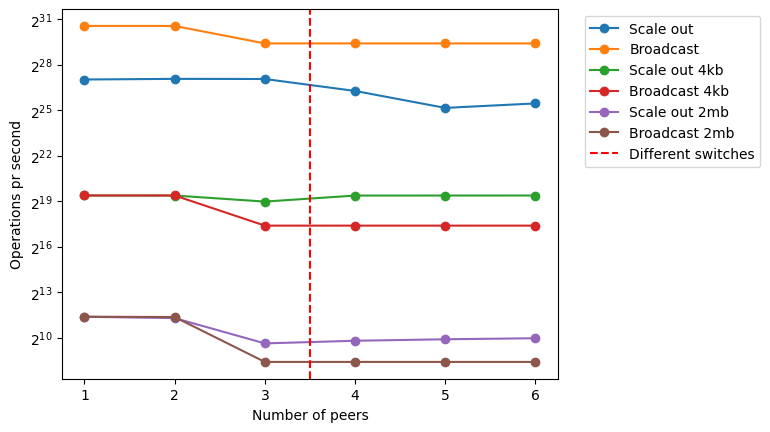

In [154]:
SCALE_OUT_KEY_PREFIX = 'PIO_WRITE_SCALE_OUT_'
BROADCAST_KEY_PREFIX = 'PIO_BROADCAST_'

scale_out_results = list(filter(lambda x: x.key.startswith(SCALE_OUT_KEY_PREFIX), experiment_results))
broadcast_results = list(filter(lambda x: x.key.startswith(BROADCAST_KEY_PREFIX), experiment_results))

scale_out_1byte = filter(lambda x: x.bytes_pr_operation == 1, scale_out_results)
broadcast_1byte = filter(lambda x: x.bytes_pr_operation == 1, broadcast_results)

scale_out_4k = filter(lambda x: x.bytes_pr_operation == 4096, scale_out_results)
broadcast_4k = filter(lambda x: x.bytes_pr_operation == 4096, broadcast_results)

scale_out_2meg = filter(lambda x: x.bytes_pr_operation == 2097152, scale_out_results)
broadcast_2meg = filter(lambda x: x.bytes_pr_operation == 2097152, broadcast_results)

data = dict()
data['scale_out_1byte'] = list(map(lambda x: x.operations / 2, scale_out_1byte))
data['broadcast_1byte'] = list(map(lambda x: x.operations / 2, broadcast_1byte))
data['scale_out_4k'] = list(map(lambda x: x.operations / 2, scale_out_4k))
data['broadcast_4k'] = list(map(lambda x: x.operations / 2, broadcast_4k))
data['scale_out_2meg'] = list(map(lambda x: x.operations / 2, scale_out_2meg))
data['broadcast_2meg'] = list(map(lambda x: x.operations / 2, broadcast_2meg))

x_label = 'Number of peers'
y_label = 'Operations pr second'

plt.plot(range(1, PEERS + 1), data['scale_out_1byte'], label='Scale out', marker='o')
plt.plot(range(1, PEERS + 1), data['broadcast_1byte'], label='Broadcast', marker='o')
plt.plot(range(1, PEERS + 1), data['scale_out_4k'], label='Scale out 4kb', marker='o')
plt.plot(range(1, PEERS + 1), data['broadcast_4k'], label='Broadcast 4kb', marker='o')
plt.plot(range(1, PEERS + 1), data['scale_out_2meg'], label='Scale out 2mb', marker='o')
plt.plot(range(1, PEERS + 1), data['broadcast_2meg'], label='Broadcast 2mb', marker='o')
plt.xticks(range(1, PEERS + 1))
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.yscale('log', base=2)
plt.axvline(x = 3.5, label="Different switches", color='red', linestyle='--')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

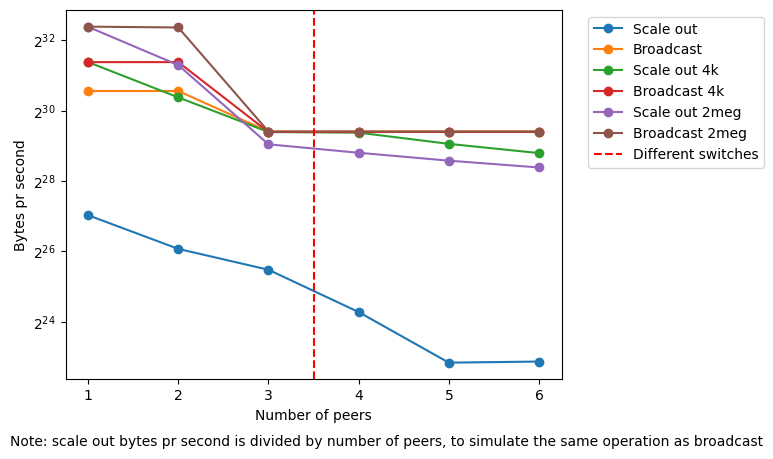

In [147]:
SCALE_OUT_KEY_PREFIX = 'PIO_WRITE_SCALE_OUT_'
BROADCAST_KEY_PREFIX = 'PIO_BROADCAST_'

scale_out_results = list(filter(lambda x: x.key.startswith(SCALE_OUT_KEY_PREFIX), experiment_results))
broadcast_results = list(filter(lambda x: x.key.startswith(BROADCAST_KEY_PREFIX), experiment_results))

scale_out_1byte = filter(lambda x: x.bytes_pr_operation == 1, scale_out_results)
broadcast_1byte = filter(lambda x: x.bytes_pr_operation == 1, broadcast_results)

scale_out_4k = filter(lambda x: x.bytes_pr_operation == 4096, scale_out_results)
broadcast_4k = filter(lambda x: x.bytes_pr_operation == 4096, broadcast_results)

scale_out_2meg = filter(lambda x: x.bytes_pr_operation == 2097152, scale_out_results)
broadcast_2meg = filter(lambda x: x.bytes_pr_operation == 2097152, broadcast_results)

data = dict()
data['scale_out_1byte'] = list(map(lambda x: x.operations / 2, scale_out_1byte))
data['broadcast_1byte'] = list(map(lambda x: x.operations / 2, broadcast_1byte))
data['scale_out_4k'] = list(map(lambda x: (x.operations / 2) * 4096, scale_out_4k))
data['broadcast_4k'] = list(map(lambda x: (x.operations / 2) * 4096, broadcast_4k))
data['scale_out_2meg'] = list(map(lambda x: (x.operations / 2) * 2097152, scale_out_2meg))
data['broadcast_2meg'] = list(map(lambda x: (x.operations / 2) * 2097152, broadcast_2meg))

# divide scale out bytes by num of peers
for i in range(len(data['scale_out_1byte'])):
  data['scale_out_1byte'][i] /= i+1
  data['scale_out_4k'][i] /= i+1
  data['scale_out_2meg'][i] /= i+1

x_label = 'Number of peers'
y_label = 'Bytes pr second'

plt.plot(range(1, PEERS + 1), data['scale_out_1byte'], label='Scale out', marker='o')
plt.plot(range(1, PEERS + 1), data['broadcast_1byte'], label='Broadcast', marker='o')
plt.plot(range(1, PEERS + 1), data['scale_out_4k'], label='Scale out 4k', marker='o')
plt.plot(range(1, PEERS + 1), data['broadcast_4k'], label='Broadcast 4k', marker='o')
plt.plot(range(1, PEERS + 1), data['scale_out_2meg'], label='Scale out 2meg', marker='o')
plt.plot(range(1, PEERS + 1), data['broadcast_2meg'], label='Broadcast 2meg', marker='o')
plt.xticks(range(1, PEERS + 1))
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.yscale('log', base=2)
plt.annotate('Note: scale out bytes pr second is divided by number of peers, to simulate the same operation as broadcast', (0, 0), (-40, -40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.axvline(x = 3.5, label="Different switches", color='red', linestyle='--')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

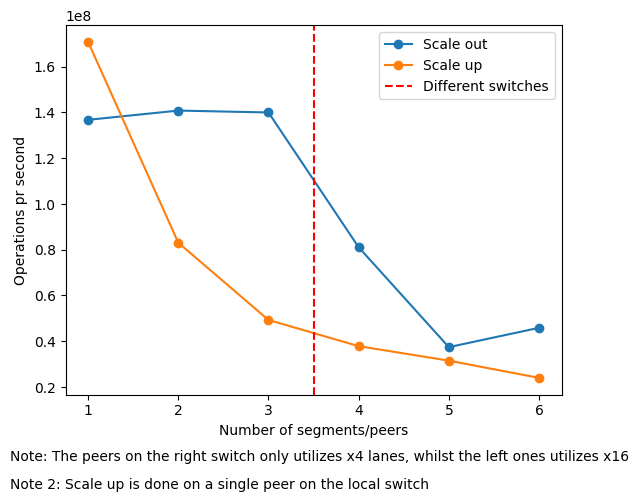

In [160]:
SCALE_OUT_KEY_PREFIX = 'PIO_WRITE_SCALE_OUT_'
SCALE_UP_KEY_PREFIX = 'PIO_WRITE_SCALE_UP_'

scale_out_results = list(filter(lambda x: x.key.startswith(SCALE_OUT_KEY_PREFIX), experiment_results))
scale_up_results = list(filter(lambda x: x.key.startswith(SCALE_UP_KEY_PREFIX), experiment_results))

scale_out_results = list(filter(lambda x: x.bytes_pr_operation == 1, scale_out_results))

assert len(scale_out_results) == PEERS
assert len(scale_up_results) == PEERS

data = dict()
data['scale_out'] = list(map(lambda x: x.operations / 2, scale_out_results))
data['scale_up'] = list(map(lambda x: x.operations / 2, scale_up_results))

x_label = 'Number of segments/peers'
y_label = 'Operations pr second'

plt.plot(range(1, PEERS + 1), data['scale_out'], label='Scale out', marker='o')
plt.plot(range(1, PEERS + 1), data['scale_up'], label='Scale up', marker='o')
plt.xticks(range(1, PEERS + 1))
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.axvline(x = 3.5, label="Different switches", color='red', linestyle='--')
plt.annotate('Note: The peers on the right switch only utilizes x4 lanes, whilst the left ones utilizes x16', (0, 0), (-40, -40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('Note 2: Scale up is done on a single peer on the local switch', (0, 0), (-40, -60), xycoords='axes fraction', textcoords='offset points', va='top')
plt.legend()
plt.show()

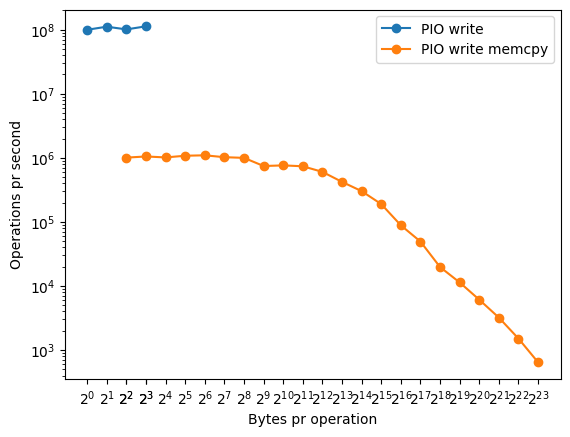

In [134]:
PIO_WRITE_KEY = 'PIO_WRITE'
PIO_WRITE_MEMCPY_KEY = 'PIO_WRITE_MEMCPY'

pio_write_results = []
pio_write_memcpy_results = []

for result in experiment_results:
  if result.key == (PIO_WRITE_KEY):
    existing_result = next((r for r in pio_write_results if r.bytes_pr_operation == result.bytes_pr_operation), None)
    if existing_result:
      existing_result.operations = result.operations
    else:
      pio_write_results.append(result)
  if result.key == (PIO_WRITE_MEMCPY_KEY):
    pio_write_memcpy_results.append(result)

data = dict()
data['pio_write'] = list(map(lambda x: x.operations / 2, pio_write_results))
data['pio_write_memcpy'] = list(map(lambda x: x.operations / 2, pio_write_memcpy_results))

pio_write_x_labels = list(map(lambda x: x.bytes_pr_operation, pio_write_results))
pio_write_memcpy_labels = list(map(lambda x: x.bytes_pr_operation, pio_write_memcpy_results))

x_label = 'Bytes pr operation'
y_label = 'Operations pr second'

plt.plot(pio_write_x_labels, data['pio_write'], label='PIO write', marker='o')
plt.plot(pio_write_memcpy_labels, data['pio_write_memcpy'], label='PIO write memcpy', marker='o')

plt.xscale('log', base=2)
plt.xticks(pio_write_x_labels + pio_write_memcpy_labels)
plt.yscale('log')

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()
plt.show()

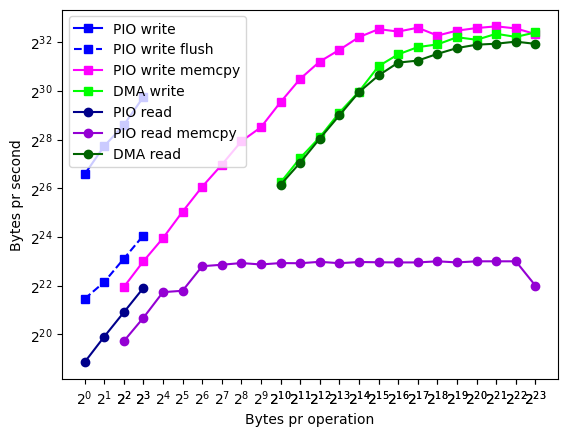

In [208]:
PIO_WRITE_KEY = 'PIO_WRITE'
PIO_WRITE_FLUSH_KEY = 'PIO_WRITE_FLUSH'
PIO_READ_KEY = 'PIO_READ'
PIO_WRITE_MEMCPY_KEY = 'PIO_WRITE_MEMCPY'
PIO_READ_MEMCPY_KEY = 'PIO_READ_MEMCPY'
DMA_WRITE_KEY = 'DMA_WRITE'
DMA_READ_KEY = 'DMA_READ'
DMA_MIN = 1000

pio_write_results = []
pio_write_flush_results = []
pio_read_results = []
pio_write_memcpy_results = []
pio_read_memcpy_results = []
dma_write_results = []
dma_read_results = []

for result in experiment_results:
  if result.key == (PIO_WRITE_KEY):
    existing_result = next((r for r in pio_write_results if r.bytes_pr_operation == result.bytes_pr_operation), None)
    if existing_result:
      existing_result.operations = result.operations
    else:
      pio_write_results.append(result)
  if result.key == (PIO_WRITE_FLUSH_KEY):
    existing_result = next((r for r in pio_write_flush_results if r.bytes_pr_operation == result.bytes_pr_operation), None)
    if existing_result:
      existing_result.operations = result.operations
    else:
      pio_write_flush_results.append(result)
  if result.key == (PIO_WRITE_MEMCPY_KEY):
    pio_write_memcpy_results.append(result)
  if result.key == (DMA_WRITE_KEY) and result.bytes_pr_operation >= DMA_MIN:
    dma_write_results.append(result)

  if result.key == (PIO_READ_KEY):
    existing_result = next((r for r in pio_read_results if r.bytes_pr_operation == result.bytes_pr_operation), None)
    if existing_result:
      existing_result.operations = result.operations
    else:
      pio_read_results.append(result)
  if result.key == (PIO_READ_MEMCPY_KEY):
    pio_read_memcpy_results.append(result)
  if result.key == (DMA_READ_KEY) and result.bytes_pr_operation >= DMA_MIN:
    dma_read_results.append(result)


data = dict()
data['pio_write'] = list(map(lambda x: (x.operations * x.bytes_pr_operation) / 2, pio_write_results))
data['pio_write_flush'] = list(map(lambda x: (x.operations * x.bytes_pr_operation) / 2, pio_write_flush_results))
data['pio_write_memcpy'] = list(map(lambda x: (x.operations * x.bytes_pr_operation) / 2, pio_write_memcpy_results))
data['dma_write'] = list(map(lambda x: (x.operations * x.bytes_pr_operation) / 2, dma_write_results))
data['pio_read'] = list(map(lambda x: (x.operations * x.bytes_pr_operation) / 2, pio_read_results))
data['pio_read_memcpy'] = list(map(lambda x: (x.operations * x.bytes_pr_operation) / 2, pio_read_memcpy_results))
data['dma_read'] = list(map(lambda x: (x.operations * x.bytes_pr_operation) / 2, dma_read_results))

pio_write_x_labels = list(map(lambda x: x.bytes_pr_operation, pio_write_results))
pio_write_flush_labels = list(map(lambda x: x.bytes_pr_operation, pio_write_flush_results))
pio_write_memcpy_labels = list(map(lambda x: x.bytes_pr_operation, pio_write_memcpy_results))
dma_write_labels = list(map(lambda x: x.bytes_pr_operation, dma_write_results))
pio_read_x_labels = list(map(lambda x: x.bytes_pr_operation, pio_read_results))
pio_read_memcpy_labels = list(map(lambda x: x.bytes_pr_operation, pio_read_memcpy_results))
dma_read_labels = list(map(lambda x: x.bytes_pr_operation, dma_read_results))

x_label = 'Bytes pr operation'
y_label = 'Bytes pr second'

plt.plot(pio_write_x_labels, data['pio_write'], label='PIO write', marker='s', color='blue')
plt.plot(pio_write_flush_labels, data['pio_write_flush'], label='PIO write flush', marker='s', color='blue', linestyle='--')
plt.plot(pio_write_memcpy_labels, data['pio_write_memcpy'], label='PIO write memcpy', marker='s', color='fuchsia')
plt.plot(dma_write_labels, data['dma_write'], label='DMA write', marker='s', color='lime')
plt.plot(pio_read_x_labels, data['pio_read'], label='PIO read', marker='o', color='darkblue')
plt.plot(pio_read_memcpy_labels, data['pio_read_memcpy'], label='PIO read memcpy', marker='o', color='darkviolet')
plt.plot(dma_read_labels, data['dma_read'], label='DMA read', marker='o', color='darkgreen')

plt.xscale('log', base=2)
plt.xticks(pio_write_x_labels + pio_write_memcpy_labels + dma_write_labels)
plt.yscale('log', base=2)

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()
plt.show()

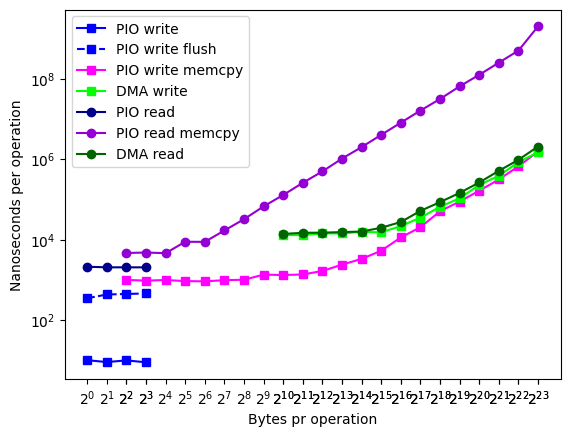

In [209]:
PIO_WRITE_KEY = 'PIO_WRITE'
PIO_WRITE_FLUSH_KEY = 'PIO_WRITE_FLUSH'
PIO_READ_KEY = 'PIO_READ'
PIO_WRITE_MEMCPY_KEY = 'PIO_WRITE_MEMCPY'
PIO_READ_MEMCPY_KEY = 'PIO_READ_MEMCPY'
DMA_WRITE_KEY = 'DMA_WRITE'
DMA_READ_KEY = 'DMA_READ'
DMA_MIN = 1000

pio_write_results = []
pio_write_flush_results = []
pio_read_results = []
pio_write_memcpy_results = []
pio_read_memcpy_results = []
dma_write_results = []
dma_read_results = []

for result in experiment_results:
  if result.key == (PIO_WRITE_KEY):
    existing_result = next((r for r in pio_write_results if r.bytes_pr_operation == result.bytes_pr_operation), None)
    if existing_result:
      existing_result.operations = result.operations
    else:
      pio_write_results.append(result)
  if result.key == (PIO_WRITE_FLUSH_KEY):
    existing_result = next((r for r in pio_write_flush_results if r.bytes_pr_operation == result.bytes_pr_operation), None)
    if existing_result:
      existing_result.operations = result.operations
    else:
      pio_write_flush_results.append(result)
  if result.key == (PIO_WRITE_MEMCPY_KEY):
    pio_write_memcpy_results.append(result)
  if result.key == (DMA_WRITE_KEY) and result.bytes_pr_operation >= DMA_MIN:
    dma_write_results.append(result)

  if result.key == (PIO_READ_KEY):
    existing_result = next((r for r in pio_read_results if r.bytes_pr_operation == result.bytes_pr_operation), None)
    if existing_result:
      existing_result.operations = result.operations
    else:
      pio_read_results.append(result)
  if result.key == (PIO_READ_MEMCPY_KEY):
    pio_read_memcpy_results.append(result)
  if result.key == (DMA_READ_KEY) and result.bytes_pr_operation >= DMA_MIN:
    dma_read_results.append(result)

def operations_to_nanoseconds(operations: int):
  return (2 / operations) * 1000000000


data = dict()
data['pio_write'] = list(map(lambda x: operations_to_nanoseconds(x.operations), pio_write_results))
data['pio_write_flush'] = list(map(lambda x: operations_to_nanoseconds(x.operations), pio_write_flush_results))
data['pio_write_memcpy'] = list(map(lambda x: operations_to_nanoseconds(x.operations), pio_write_memcpy_results))
data['dma_write'] = list(map(lambda x: operations_to_nanoseconds(x.operations), dma_write_results))
data['pio_read'] = list(map(lambda x: operations_to_nanoseconds(x.operations), pio_read_results))
data['pio_read_memcpy'] = list(map(lambda x: operations_to_nanoseconds(x.operations), pio_read_memcpy_results))
data['dma_read'] = list(map(lambda x: operations_to_nanoseconds(x.operations), dma_read_results))

pio_write_x_labels = list(map(lambda x: x.bytes_pr_operation, pio_write_results))
pio_write_flush_labels = list(map(lambda x: x.bytes_pr_operation, pio_write_flush_results))
pio_write_memcpy_labels = list(map(lambda x: x.bytes_pr_operation, pio_write_memcpy_results))
dma_write_labels = list(map(lambda x: x.bytes_pr_operation, dma_write_results))
pio_read_x_labels = list(map(lambda x: x.bytes_pr_operation, pio_read_results))
pio_read_memcpy_labels = list(map(lambda x: x.bytes_pr_operation, pio_read_memcpy_results))
dma_read_labels = list(map(lambda x: x.bytes_pr_operation, dma_read_results))

x_label = 'Bytes pr operation'
y_label = 'Nanoseconds per operation'

plt.plot(pio_write_x_labels, data['pio_write'], label='PIO write', marker='s', color='blue')
plt.plot(pio_write_flush_labels, data['pio_write_flush'], label='PIO write flush', marker='s', color='blue', linestyle='--')
plt.plot(pio_write_memcpy_labels, data['pio_write_memcpy'], label='PIO write memcpy', marker='s', color='fuchsia')
plt.plot(dma_write_labels, data['dma_write'], label='DMA write', marker='s', color='lime')
plt.plot(pio_read_x_labels, data['pio_read'], label='PIO read', marker='o', color='darkblue')
plt.plot(pio_read_memcpy_labels, data['pio_read_memcpy'], label='PIO read memcpy', marker='o', color='darkviolet')
plt.plot(dma_read_labels, data['dma_read'], label='DMA read', marker='o', color='darkgreen')

plt.xscale('log', base=2)
plt.xticks(pio_write_x_labels + pio_write_memcpy_labels + dma_write_labels)
plt.yscale('log', base=10)

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()
plt.show()

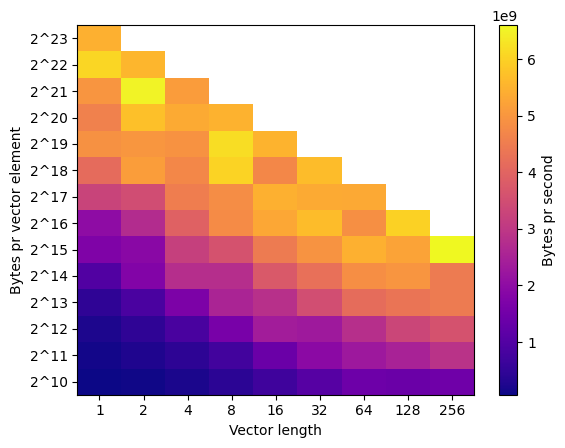

In [137]:
DMA_VECTOR_KEY_PREFIX = 'DMA_WRITE_VECTOR_'

dma_vector_results = [result for result in experiment_results if result.key.startswith(DMA_VECTOR_KEY_PREFIX)]

xs = []
ys = []
zs = []

for result in dma_vector_results:
  vec_len = int(result.key[len(DMA_VECTOR_KEY_PREFIX):])
  xs.append(vec_len)
  ys.append(result.bytes_pr_operation)
  zs.append((result.operations / 2) * result.bytes_pr_operation * vec_len)

x_label = 'Vector length'
y_label = 'Bytes pr vector element'
z_label = 'Bytes pr second'


data = pd.DataFrame({'vec_len': xs, 'bytes_pr_vec_el': ys, 'bytes_pr_sec': zs})
pivot_data = data.pivot(columns='vec_len', index='bytes_pr_vec_el', values='bytes_pr_sec')
heatmap = plt.imshow(pivot_data, cmap='plasma', aspect='auto', interpolation='none', origin='lower')
plt.colorbar(heatmap, label=z_label)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.xticks(range(len(pivot_data.columns)), pivot_data.columns)
plt.yticks(range(len(pivot_data.index)), map(lambda x: f"2^{math.log2(x):.0f}", pivot_data.index))
plt.show()

In [182]:
data

{'var_seg_size': [3320744.5,
  3318338.5,
  3312986.0,
  3308849.0,
  3297713.0,
  3325979.5,
  3321014.0,
  3307908.5,
  3300363.0,
  3308683.0,
  3315894.0,
  3315364.5]}

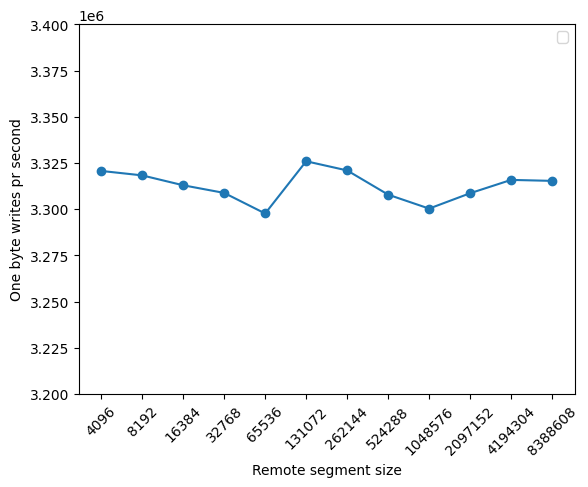

In [206]:
VAR_SEG_SIZE_KEY = 'PIO_WRITE_FLUSH_SEG_SIZE_'

var_seg_size_results = list(filter(lambda x: x.key.startswith(VAR_SEG_SIZE_KEY), experiment_results))
sizes = [int(x.key[len(VAR_SEG_SIZE_KEY):]) for x in var_seg_size_results]

data = dict()
data['var_seg_size'] = list(map(lambda x: x.operations / 2, var_seg_size_results))

x_label = 'Remote segment size'
y_label = 'One byte writes pr second'

fig, ax = plt.subplots()

ax.plot(range(len(sizes)), data['var_seg_size'], marker='o')
ax.set_ylim(3200000, 3400000)

plt.xticks(range(len(sizes)), sizes, rotation=45)

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()
plt.show()